In [18]:
## Import necessary libraries for data manipulation and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [19]:
##Load the datasets into pandas DataFrames for further analysis.

In [3]:
customers = pd.read_csv('Customers.csv', parse_dates=['SignupDate'])
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv', parse_dates=['TransactionDate'])

In [20]:
##Inspect the structure and quality of each dataset.

In [5]:
print("Customers Data:")
print(customers.info())
print("\nMissing Values in Customers:", customers.isnull().sum())

print("\nProducts Data:")
print(products.info())
print("\nMissing Values in Products:", products.isnull().sum())

print("\nTransactions Data:")
print(transactions.info())
print("\nMissing Values in Transactions:", transactions.isnull().sum())

Customers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None

Missing Values in Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)


In [25]:
##Combine the transactions data with customer and product information. 
##Merging datasets allows for a comprehensive analysis by bringing together related information, enabling 
##insights that span multiple data sources.

In [6]:
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left', suffixes=('_txn', '_prod'))

In [ ]:
##Analyze the trend of total sales over time on a monthly basis.
## Why it's needed: Understanding sales trends helps identify seasonal patterns,
##growth rates, and potential anomalies, which are crucial for strategic planning and forecasting.

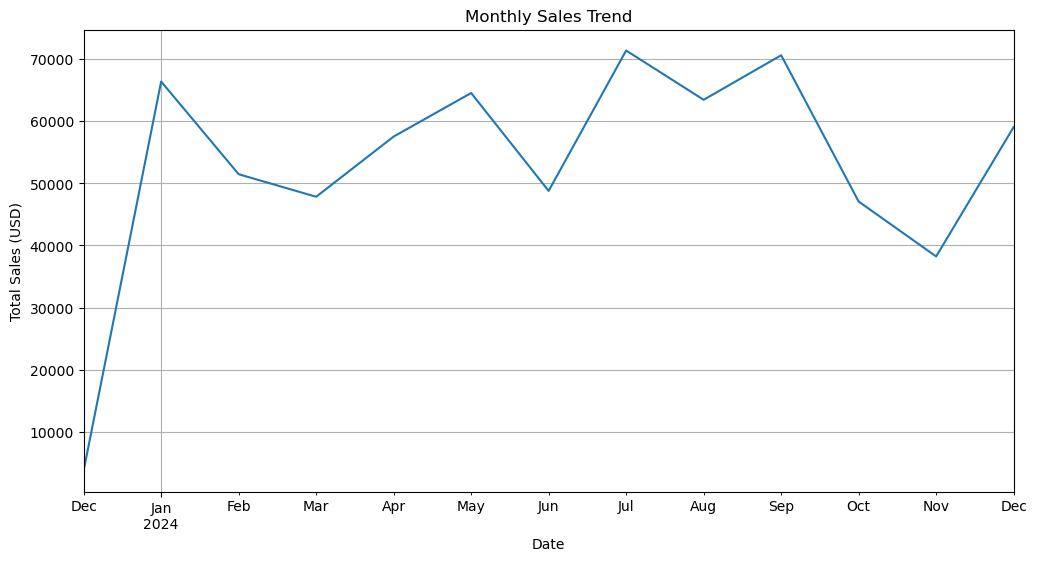

In [7]:
plt.figure(figsize=(12,6))
merged_data.set_index('TransactionDate').resample('M')['TotalValue'].sum().plot()
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [26]:
##Evaluate sales performance and customer base across different regions.
##Regional analysis reveals geographic strengths and weaknesses,
##informing targeted marketing strategies and resource allocation.

In [8]:
region_analysis = merged_data.groupby('Region').agg({
    'TotalValue': 'sum',
    'CustomerID': pd.Series.nunique
}).rename(columns={'TotalValue':'TotalSales', 'CustomerID':'UniqueCustomers'})

In [9]:
region_analysis['AvgSpending'] = region_analysis['TotalSales'] / region_analysis['UniqueCustomers']
print("\nRegional Performance:")
print(region_analysis)


Regional Performance:
               TotalSales  UniqueCustomers  AvgSpending
Region                                                 
Asia            152074.97               44  3456.249318
Europe          166254.63               50  3325.092600
North America   152313.40               46  3311.160870
South America   219352.56               59  3717.840000


In [28]:
##Identify the top-performing products based on revenue.
##Knowing which products generate the most revenue helps in 
##inventory management, marketing focus, and product development strategies.

In [10]:
top_products = merged_data.groupby('ProductName').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).sort_values('TotalValue', ascending=False).head(10)

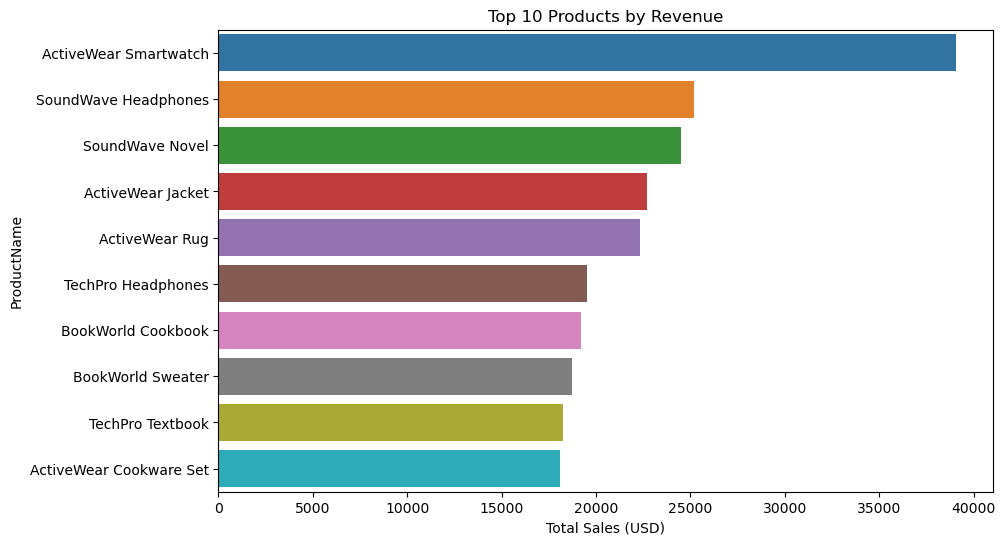

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x='TotalValue', y=top_products.index, data=top_products)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Sales (USD)')
plt.show()

In [ ]:
##Summarize customer purchasing behavior in terms of purchase frequency and total spending.
##Understanding customer behavior helps in segmenting customers, personalizing marketing efforts, and improving customer retention strategies.

In [12]:
customer_activity = merged_data.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum'
}).rename(columns={'TransactionID':'PurchaseCount', 'TotalValue':'TotalSpent'})

print("\nCustomer Behavior Summary:")
print(customer_activity.describe())


Customer Behavior Summary:
       PurchaseCount    TotalSpent
count     199.000000    199.000000
mean        5.025126   3467.314372
std         2.198340   1832.677958
min         1.000000     82.360000
25%         3.000000   2162.040000
50%         5.000000   3137.660000
75%         6.000000   4770.225000
max        11.000000  10673.870000


In [30]:
##Analyze the trend of new customer signups over time.

<Figure size 1200x600 with 0 Axes>

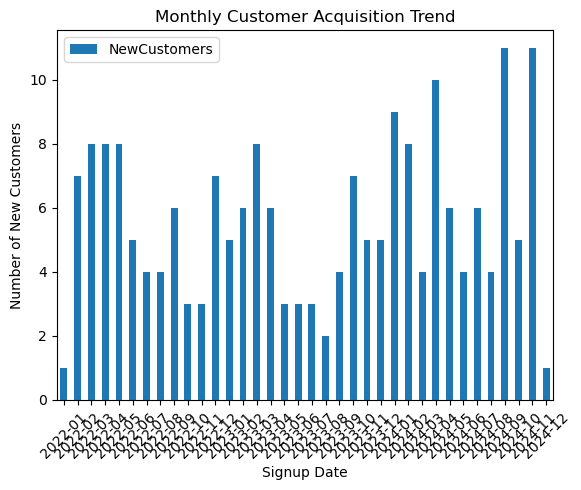

In [13]:
customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trend = customers.groupby('SignupYearMonth').size().reset_index(name='NewCustomers')

plt.figure(figsize=(12,6))
signup_trend.plot(x='SignupYearMonth', y='NewCustomers', kind='bar')
plt.title('Monthly Customer Acquisition Trend')
plt.xlabel('Signup Date')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45)
plt.show()

In [29]:
##Identify discrepancies between transaction prices and product catalog prices.

In [14]:
price_discrepancy = merged_data[merged_data['Price_txn'] != merged_data['Price_prod']]
print(f"\nPrice Discrepancies Found: {len(price_discrepancy)} transactions")


Price Discrepancies Found: 0 transactions


In [15]:
merged_data.to_csv('Merged_Data.csv', index=False)